# K MEANS CLUSTERING   

# AUTOINSURANCE DATA SET 

#  Problem statement
  
  
  The insurance company has a large number of customers that has Autoinsur  . The objective of this project is to group similar customers into clusters draw insights about each cluster
  
  
  `CRISP-ML(Q)` process model describes six phases:

1. Business and Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation
5. Deployment
6. Monitoring and Maintenance

OBJECTIVE :-  maximize the business revenue

CONSTRAINTS  :-  maximize the understanding of customer behaviour
  
  
  **Success Criteria**

- **Business Success Criteria**: Achieve better understanding of the customers

- **ML Success Criteria**: Achieve Silhoutte coefficient of atleast 0.6

- **Economic Success Criteria**: To increse the revenue at least 20 _30%

**Proposed Plan:**
Grouping the available customer data  will allow to understand the characteristics of each group.



# DATA COLLECTION
 
 DATA :  The data of the Autoinsurance.csv dataset has been available publicly
 
 DATA DICTIONARY :
 
 Their are 24 features and 9135 observations in the dataset
  
  DESCRIPTION : 
  
Customer -- Customer ID

State -- The State the insured customer belongs too

Customer Lifetime Value -- Timeline since the customer is a customer to the insurance company

Response -- 

Coverage -- Category of the coverage provided by the insurance to the insured

Education -- Educational qualification of the Insured

Effective to date -- Till when is the insurance valid

EmploymentStatus -- Employent status of the Insured

Gender - Gender of the Insured

Income - Monthly income of the Insured person

Location Code -- Location code of the person residing at

Marital Status -- Marital status of the Insured

Monthly Premium Auto -- Monthly premium of the Insurance

Months Since Last Claim

Months since Policy Inception -- Months since policy started/ came into action

Number of open complaints -- Open compaints if any

Number of Policies -- Number of policies held by the Insured

Policy Type -- Policy type of the Insurance i.e Personal or Corporate

Policy -- Policy category under type

Renew offer type -- Offer type to renew the insurance selected

Sales Channel -- The channel from where the Insurance was sold or incepted.

Total Claim Amount -- The claim amount allotted for the vehicle insurance

Vehicle Class - Vehicle class

Vehicle Size -- The size of the vehicle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from feature_engine.outliers import Winsorizer

In [2]:
insur = pd.read_csv(r"C:\Users\amare\Downloads\Dataset_Assignment Clustering (1)\AutoInsurance.csv")
insur

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
insur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# EXPLORATORY DATA ANALYSIS

In [4]:
### 1ST MOMENT BUSINESS DECISION
insur.mean()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1099307143.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.mean()


Customer Lifetime Value           8004.940475
Income                           37657.380009
Monthly Premium Auto                93.219291
Months Since Last Claim             15.097000
Months Since Policy Inception       48.064594
Number of Open Complaints            0.384388
Number of Policies                   2.966170
Total Claim Amount                 434.088794
dtype: float64

In [5]:
insur.median()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\718191711.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.median()


Customer Lifetime Value           5780.182197
Income                           33889.500000
Monthly Premium Auto                83.000000
Months Since Last Claim             14.000000
Months Since Policy Inception       48.000000
Number of Open Complaints            0.000000
Number of Policies                   2.000000
Total Claim Amount                 383.945434
dtype: float64

In [6]:
### 2nd moment business decision
insur.var()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\3473736270.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.var()


Customer Lifetime Value          4.721020e+07
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64

In [7]:
insur.std()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\2810712511.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.std()


Customer Lifetime Value           6870.967608
Income                           30379.904734
Monthly Premium Auto                34.407967
Months Since Last Claim             10.073257
Months Since Policy Inception       27.905991
Number of Open Complaints            0.910384
Number of Policies                   2.390182
Total Claim Amount                 290.500092
dtype: float64

In [8]:
### 3RD MOMENT BUSINESS DECISION 
insur.skew()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1618099894.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.skew()


Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [9]:
### 4RT MOMENT BUSINESS DECISION
insur.kurt()

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1956007122.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  insur.kurt()


Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Number of Open Complaints         7.749308
Number of Policies                0.363157
Total Claim Amount                5.979401
dtype: float64

In [10]:
insur.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# AUTO EDA

In [11]:
import dtale
d = dtale.show(insur)
d.open_browser()

# PREPROCESSING

In [12]:
##3 TYPECASTING 
insur.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [13]:
#### DUPLICATION
duplicate = insur.duplicated()
print(duplicate)
sum(duplicate)

0       False
1       False
2       False
3       False
4       False
        ...  
9129    False
9130    False
9131    False
9132    False
9133    False
Length: 9134, dtype: bool


0

In [14]:
### MISSING VALUES -- IMPUTATION
insur.isnull().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [15]:
## DIVIDING DATASET TO NUMERICAL AND CATEGORICAL

In [16]:
insur_cat = insur.select_dtypes(include='object')
insur_cat

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,3/2/2011,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,10/2/2011,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,12/2/2011,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,6/2/2011,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,3/2/2011,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [17]:
insur_num = insur.select_dtypes(include = ('float','int'))
insur_num

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Customer Lifetime Value             AxesSubplot(0.125,0.11;0.0824468x0.77)
Income                           AxesSubplot(0.223936,0.11;0.0824468x0.77)
Monthly Premium Auto             AxesSubplot(0.322872,0.11;0.0824468x0.77)
Months Since Last Claim          AxesSubplot(0.421809,0.11;0.0824468x0.77)
Months Since Policy Inception    AxesSubplot(0.520745,0.11;0.0824468x0.77)
Number of Open Complaints        AxesSubplot(0.619681,0.11;0.0824468x0.77)
Number of Policies               AxesSubplot(0.718617,0.11;0.0824468x0.77)
Total Claim Amount               AxesSubplot(0.817553,0.11;0.0824468x0.77)
dtype: object

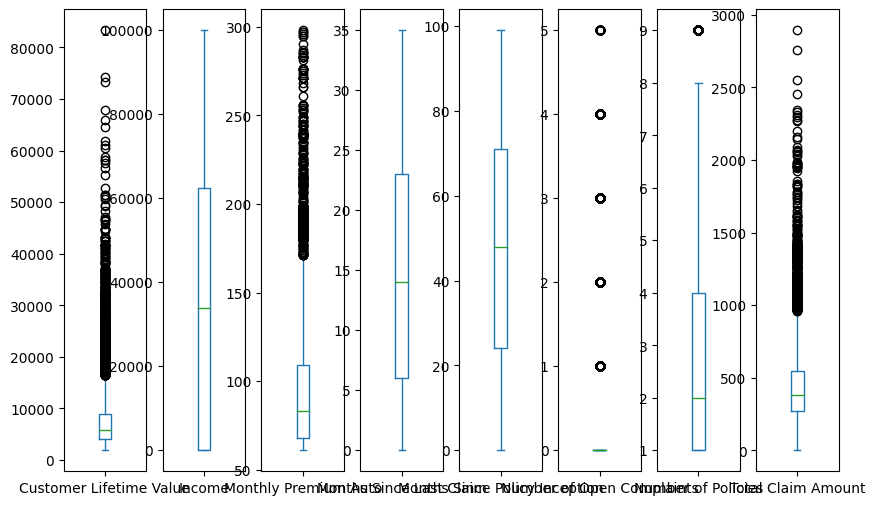

In [18]:
## OUTLIER TREATMENT
insur_num.plot(kind = 'box' , subplots = True , sharey = False , figsize = (10,6))

In [19]:
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Customer Lifetime Value'])

insur_num['Customer Lifetime Value'] = winsor.fit_transform(insur_num[['Customer Lifetime Value']])

In [20]:
winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Monthly Premium Auto'])

insur_num['Monthly Premium Auto'] = winsor.fit_transform(insur_num[['Monthly Premium Auto']])

In [21]:
winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Number of Policies'])

insur_num['Number of Policies'] = winsor.fit_transform(insur_num[['Number of Policies']])

In [22]:
winsor = Winsorizer(capping_method = 'iqr',  tail = 'both',  
                                            fold = 1.5,
                                   variables = ['Total Claim Amount'])

insur_num['Total Claim Amount'] = winsor.fit_transform(insur_num[['Total Claim Amount']])

In [23]:
winsor = Winsorizer(capping_method = 'gaussian',  tail = 'both',  
                                            fold = 3,
                                   variables = ['Number of Open Complaints'])

insur_num['Number of Open Complaints'] = winsor.fit_transform(insur_num[['Number of Open Complaints']])

Customer Lifetime Value             AxesSubplot(0.125,0.11;0.0824468x0.77)
Income                           AxesSubplot(0.223936,0.11;0.0824468x0.77)
Monthly Premium Auto             AxesSubplot(0.322872,0.11;0.0824468x0.77)
Months Since Last Claim          AxesSubplot(0.421809,0.11;0.0824468x0.77)
Months Since Policy Inception    AxesSubplot(0.520745,0.11;0.0824468x0.77)
Number of Open Complaints        AxesSubplot(0.619681,0.11;0.0824468x0.77)
Number of Policies               AxesSubplot(0.718617,0.11;0.0824468x0.77)
Total Claim Amount               AxesSubplot(0.817553,0.11;0.0824468x0.77)
dtype: object

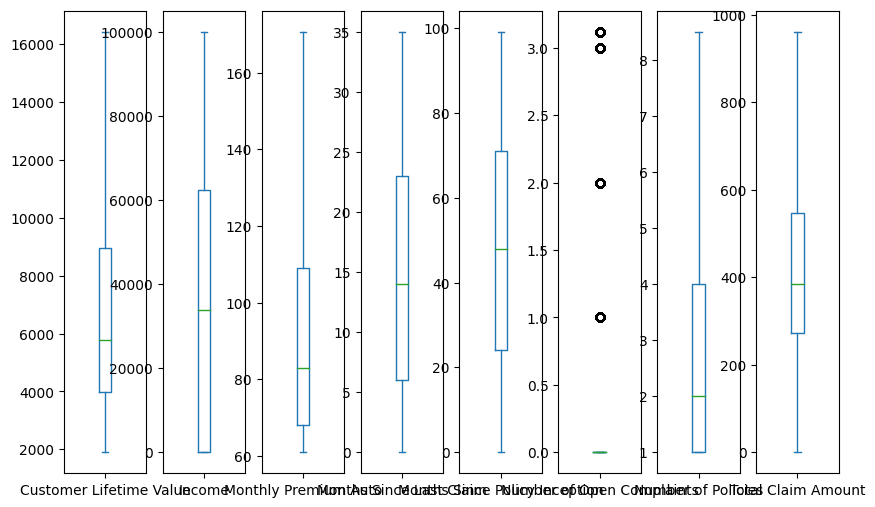

In [24]:
insur_num.plot(kind = 'box' , subplots = True , sharey = False , figsize = (10,6))

In [25]:
# Now we import the label encoder function from scikit learn
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
x = insur.iloc[:, [1,3,4,5,7,8,10,11,17,18,19,20,22,23]]  


x['State'] = labelencoder.fit_transform(x['State'])
x['Response'] = labelencoder.fit_transform(x['Response'])
x['Coverage'] = labelencoder.fit_transform(x['Coverage'])
x['Education'] = labelencoder.fit_transform(x['Education'])
x['EmploymentStatus'] = labelencoder.fit_transform(x['EmploymentStatus'])
x['Gender'] = labelencoder.fit_transform(x['Gender'])
x['Location Code'] = labelencoder.fit_transform(x['Location Code'])
x['Policy Type'] = labelencoder.fit_transform(x['Policy Type'])
x['Policy'] = labelencoder.fit_transform(x['Policy'])
x['Renew Offer Type'] = labelencoder.fit_transform(x['Renew Offer Type'])
x['Sales Channel'] = labelencoder.fit_transform(x['Sales Channel'])
x['Marital Status'] = labelencoder.fit_transform(x['Marital Status'])
x['Vehicle Class'] = labelencoder.fit_transform(x['Vehicle Class'])
x['Vehicle Size'] = labelencoder.fit_transform(x['Vehicle Size'])


x

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1136696022.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1136696022.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\amare\AppData\Local\Temp\ipykernel_14928\1136696022.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,4,0,0,0,1,0,1,1,0,2,0,0,5,1
1,0,0,1,0,4,0,1,2,1,5,2,0,0,1
2,2,0,2,0,1,0,1,1,1,5,0,0,5,1
3,1,0,0,0,4,1,1,1,0,1,0,2,3,1
4,4,0,0,0,1,1,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,1,3,0,1
9130,1,1,1,1,1,0,1,0,0,2,0,1,0,1
9131,1,0,1,0,4,1,1,2,0,1,0,1,0,1
9132,1,0,1,1,1,1,1,1,1,4,2,1,0,0


In [26]:
## GRAPHICAL REPRESENTATION

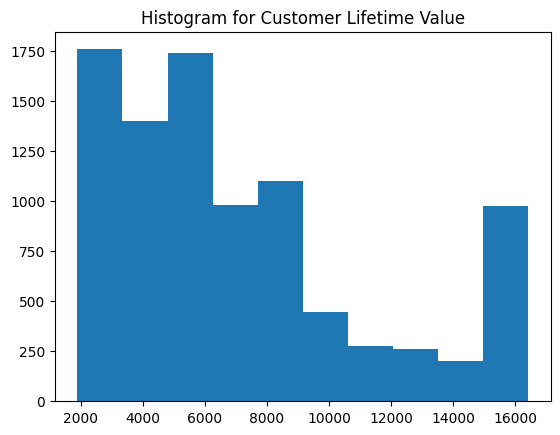

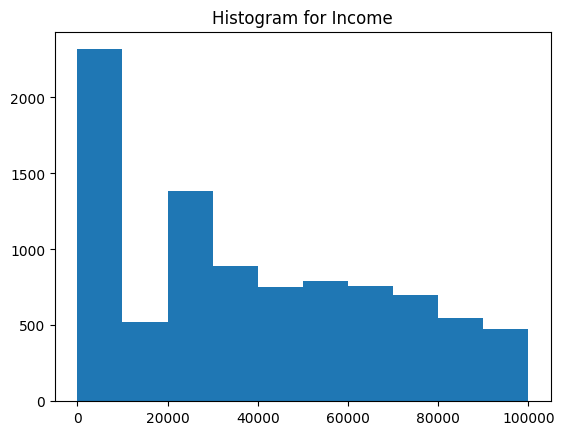

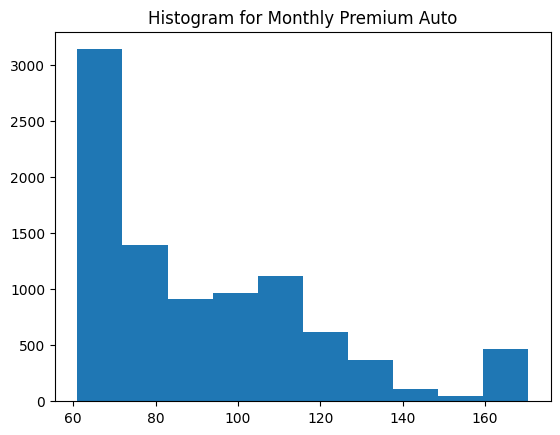

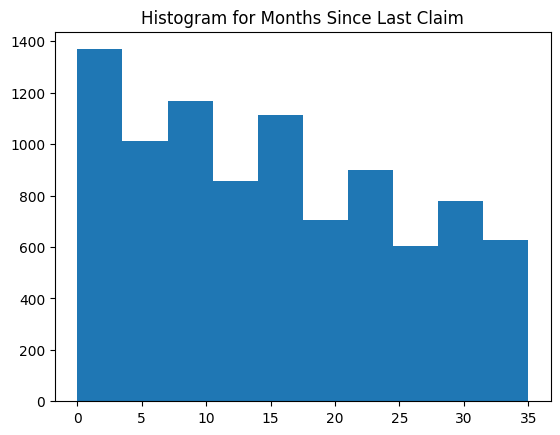

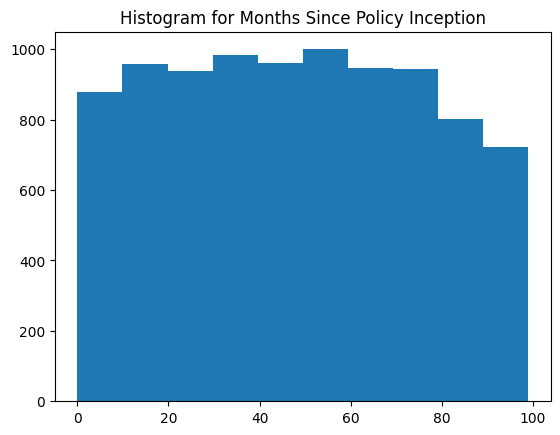

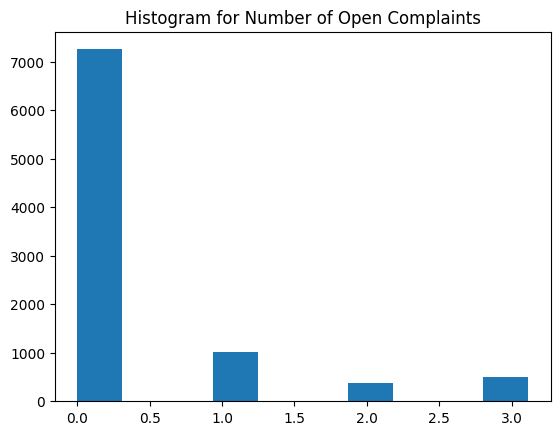

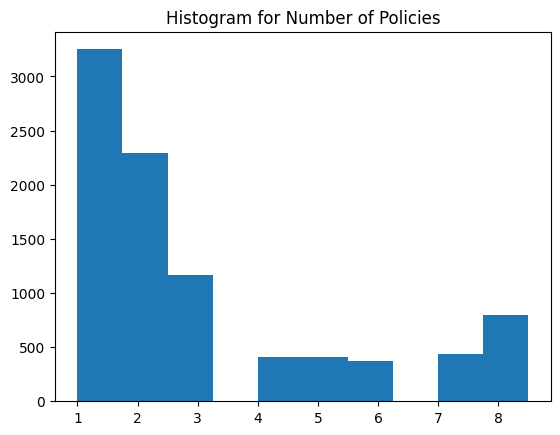

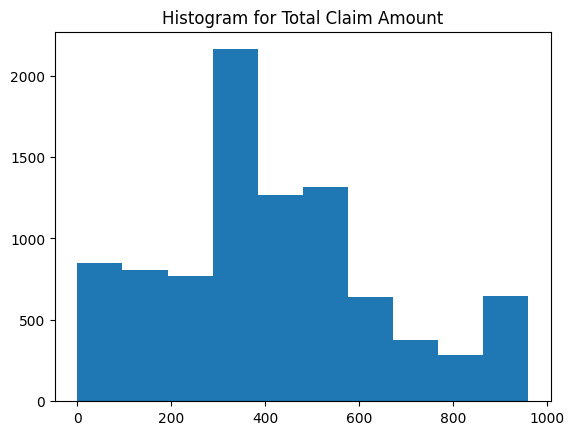

In [27]:
%matplotlib inline

for i in insur_num.columns:
  plt.hist(x = insur_num[i])
  plt.title("Histogram for " + str(i))
  plt.show()

In [28]:
### BIVARIATE ANALYSIS

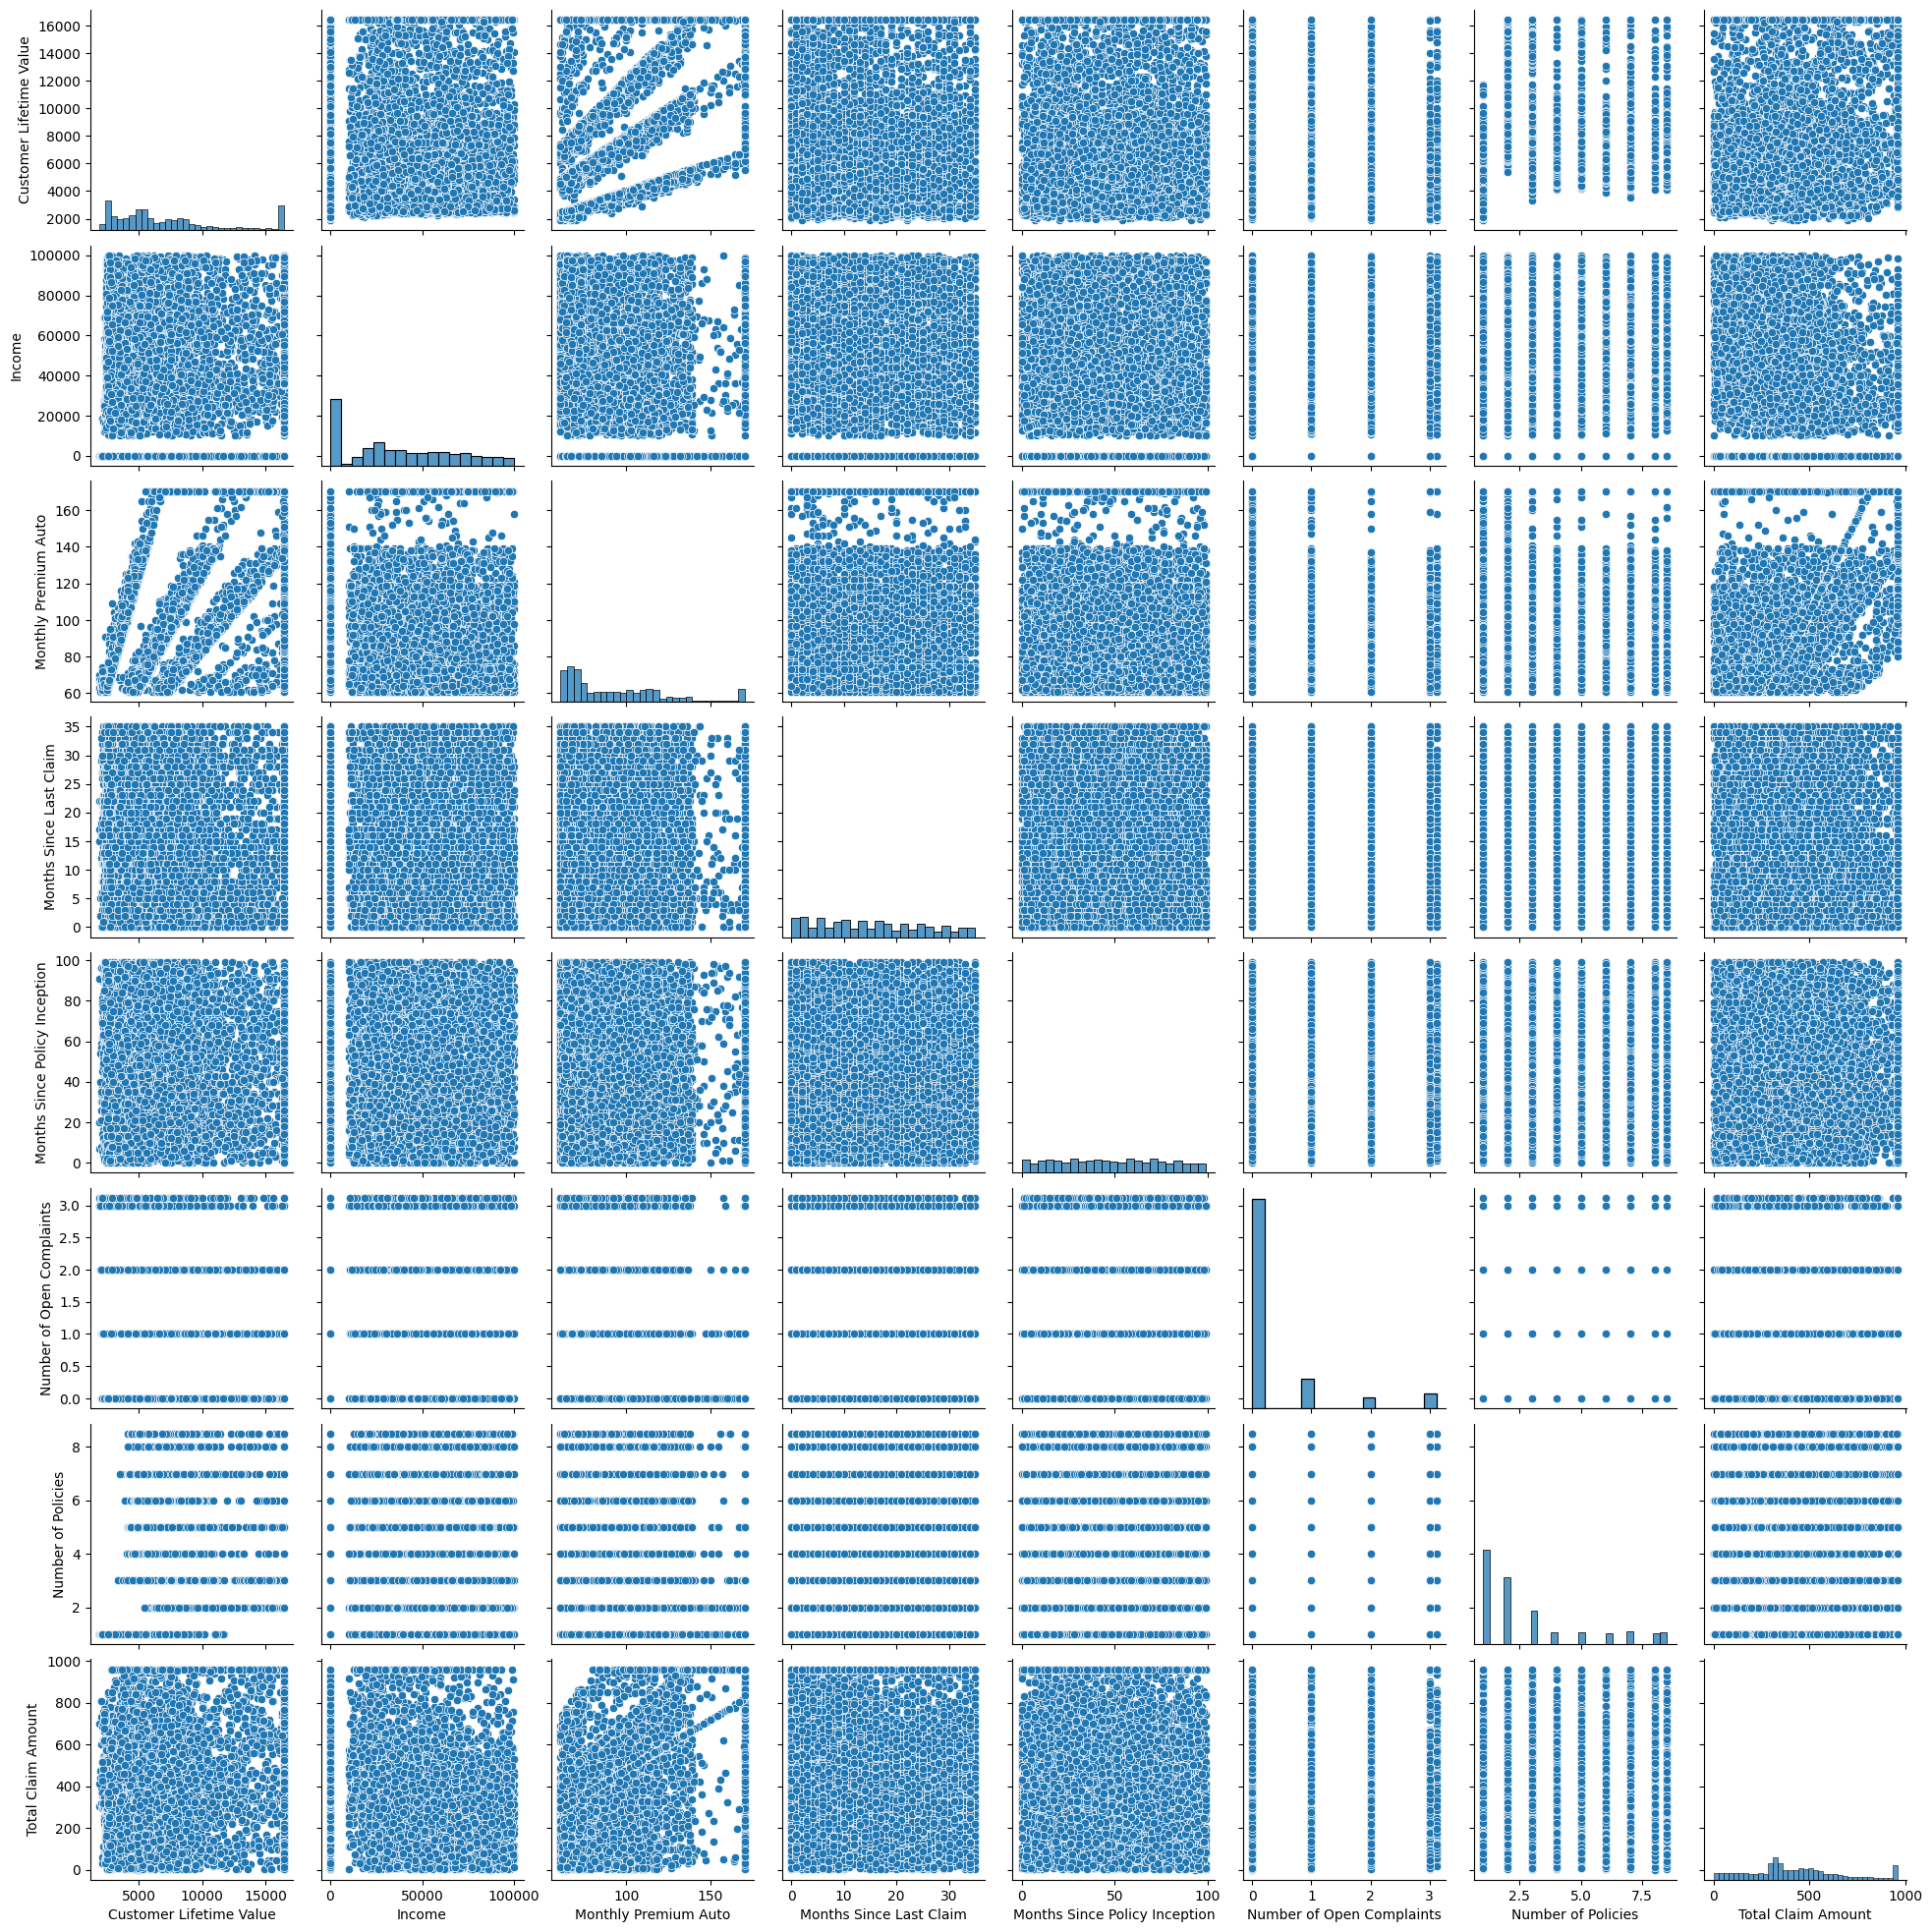

In [29]:
sns.pairplot(insur_num)

In [30]:
insur_new = pd.concat([x , insur_num] , axis = 1)
insur_new

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,4,0,0,0,1,0,1,1,0,2,...,5,1,2763.519279,56274,69.0,32,5,0.0,1.0,384.811147
1,0,0,1,0,4,0,1,2,1,5,...,0,1,6979.535903,0,94.0,13,42,0.0,8.0,960.399730
2,2,0,2,0,1,0,1,1,1,5,...,5,1,12887.431650,48767,108.0,18,38,0.0,2.0,566.472247
3,1,0,0,0,4,1,1,1,0,1,...,3,1,7645.861827,0,106.0,18,65,0.0,7.0,529.881344
4,4,0,0,0,1,1,0,2,1,3,...,0,1,2813.692575,43836,73.0,12,44,0.0,1.0,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,1,1,2,1,1,3,...,0,1,16414.039912,71941,73.0,18,89,0.0,2.0,198.234764
9130,1,1,1,1,1,0,1,0,0,2,...,0,1,3096.511217,21604,79.0,14,28,0.0,1.0,379.200000
9131,1,0,1,0,4,1,1,2,0,1,...,0,1,8163.890428,0,85.0,9,37,3.0,2.0,790.784983
9132,1,0,1,1,1,1,1,1,1,4,...,0,0,7524.442436,21941,96.0,34,3,0.0,3.0,691.200000


In [31]:
### NORMALIZATION

In [32]:
def norm_func(i):
  x = (i-i.min()) / (i.max()-i.min())
  return(x)

In [33]:
insur_norm = norm_func(insur_new.iloc[: , 1:])
insur_norm.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.0,0.0,0.0,0.25,0.0,0.5,0.5,0.0,0.250,0.000000,...,1.0,0.5,0.059625,0.562847,0.073059,0.914286,0.050505,0.0,0.000000,0.400616
1,0.0,0.5,0.0,1.00,0.0,0.5,1.0,0.5,0.625,0.666667,...,0.0,0.5,0.350063,0.000000,0.301370,0.371429,0.424242,0.0,0.933333,1.000000
2,0.0,1.0,0.0,0.25,0.0,0.5,0.5,0.5,0.625,0.000000,...,1.0,0.5,0.757054,0.487763,0.429224,0.514286,0.383838,0.0,0.133333,0.589787
3,0.0,0.0,0.0,1.00,1.0,0.5,0.5,0.0,0.125,0.000000,...,0.6,0.5,0.395966,0.000000,0.410959,0.514286,0.656566,0.0,0.800000,0.551684
4,0.0,0.0,0.0,0.25,1.0,0.0,1.0,0.5,0.375,0.000000,...,0.0,0.5,0.063081,0.438443,0.109589,0.342857,0.444444,0.0,0.000000,0.143738


In [34]:
insur_norm.describe()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,...,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.143201,0.240311,0.388521,0.456427,0.490037,0.489545,0.560105,0.412963,0.474724,0.323407,...,0.378476,0.544778,0.364266,0.376645,0.278490,0.431343,0.485501,0.115043,0.259120,0.435513
std,0.350297,0.327909,0.345495,0.336948,0.499928,0.302866,0.318419,0.237994,0.200747,0.335859,...,0.414598,0.268656,0.291685,0.303857,0.259509,0.287807,0.281879,0.259113,0.311241,0.250186
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.500000,0.500000,0.375000,0.000000,...,0.000000,0.500000,0.144409,0.000000,0.063927,0.171429,0.242424,0.000000,0.000000,0.283410
50%,0.000000,0.000000,0.250000,0.250000,0.000000,0.500000,0.500000,0.500000,0.500000,0.333333,...,0.000000,0.500000,0.267440,0.338959,0.200913,0.400000,0.484848,0.000000,0.133333,0.399715
75%,0.000000,0.500000,0.750000,1.000000,1.000000,0.500000,1.000000,0.500000,0.625000,0.666667,...,0.800000,0.500000,0.486645,0.623318,0.438356,0.657143,0.717172,0.000000,0.400000,0.570046
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#  CLUSTERING MODEL BUILDING

# HIERARCHIAL CLUSTERING

In [35]:
from scipy.cluster.hierarchy import linkage , dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

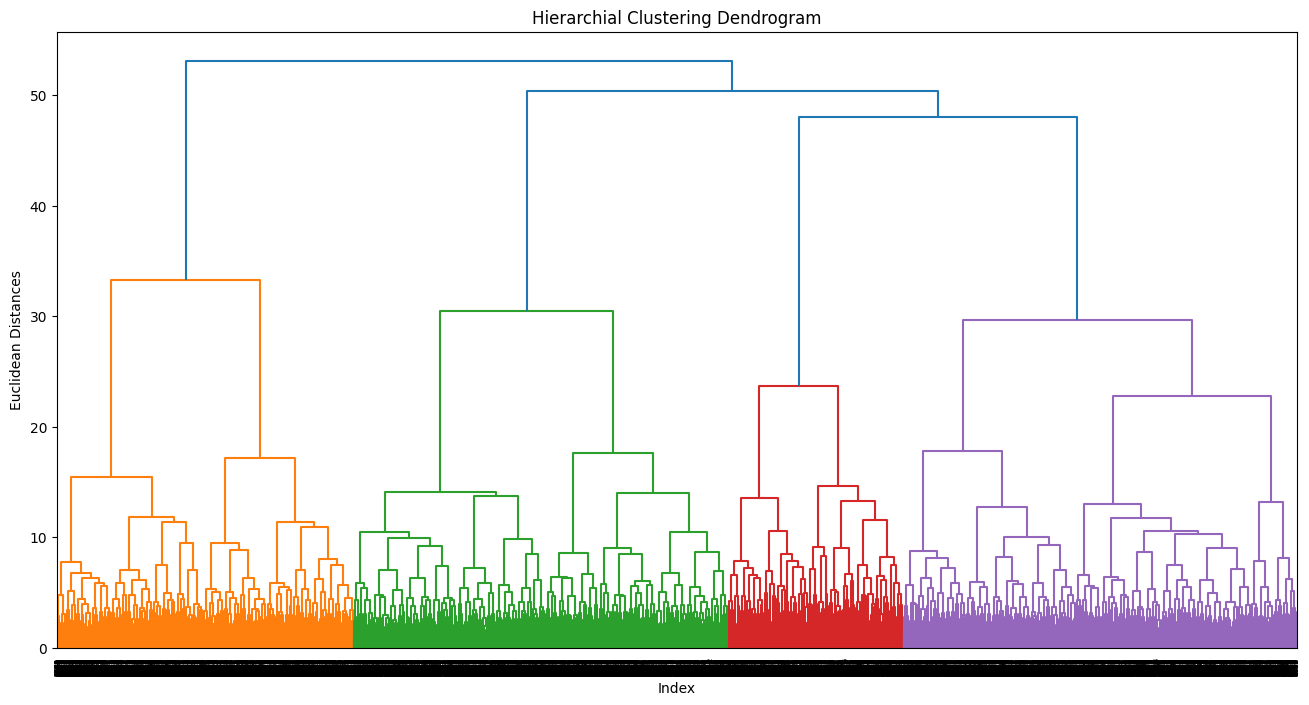

In [37]:
plt.figure(1 , figsize =(16,8))
tree_plot = dendrogram(linkage(insur_norm, method = "ward"))
plt.title('Hierarchial Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Euclidean Distances')
plt.show()

In [38]:
hc1 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')

crime_hc_average = hc1.fit_predict(insur_norm)
crime_hc_average

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')

crime_hc_complete = hc2.fit_predict(insur_norm)
crime_hc_complete

array([2, 2, 2, ..., 1, 3, 2], dtype=int64)

In [40]:
hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'single')

crime_hc_single= hc3.fit_predict(insur_norm)
crime_hc_single

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
hc1.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
cluster_labels = pd.Series(hc1.labels_)

In [44]:
insur['cluster']= cluster_labels

In [45]:
insur.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,cluster
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,0
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,0
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,0
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,0
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,0


In [48]:
insur_norm.iloc[:, 0:].groupby(insur.cluster).mean()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,...,Vehicle Class,Vehicle Size,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.138767,0.237996,0.386591,0.456828,0.491960,0.489703,0.560463,0.412830,0.474807,0.324156,...,0.377930,0.544934,0.363156,0.377341,0.277071,0.429902,0.485678,0.113743,0.257673,0.434410
1,0.750000,0.000000,0.484375,0.531250,0.062500,0.531250,1.000000,0.343750,0.406250,0.062500,...,0.875000,0.750000,0.175502,0.080511,0.051370,0.817857,0.327020,0.764659,0.537500,0.358797
2,0.972973,0.918919,0.831081,0.331081,0.189189,0.418919,0.270270,0.459459,0.469595,0.243243,...,0.281081,0.432432,0.722128,0.334897,0.730470,0.628571,0.523069,0.130130,0.486486,0.744816
3,0.000000,0.000000,0.000000,0.250000,1.000000,1.000000,1.000000,1.000000,1.000000,0.666667,...,1.000000,0.000000,0.217303,0.346516,0.073059,0.028571,0.020202,0.962962,0.533333,0.229457


In [49]:
from sklearn import metrics

In [50]:
metrics.silhouette_score(insur_norm ,cluster_labels)

0.07236516647465081

In [52]:
#   Cluster 0 = the group of Insured people who are the ones who have lower income and might be bent towards a fraud transaction.
#   Cluster 1 = the group of Insured people who are the ones who have lowest income  
#   Cluster 2 = the group of Insured people who are the ones have moderate income
#   Cluster 3 = the group of Insured people who are the ones have moderate income and tend to fradualent